## 🧠 **Sentiment Analysis on IMDB Movie Reviews**


### **PROJECT DEVELOP BY :** KEVIN MARAKANA
This project aims to classify movie reviews as **positive** or **negative** using natural language processing and machine learning techniques.

<br>

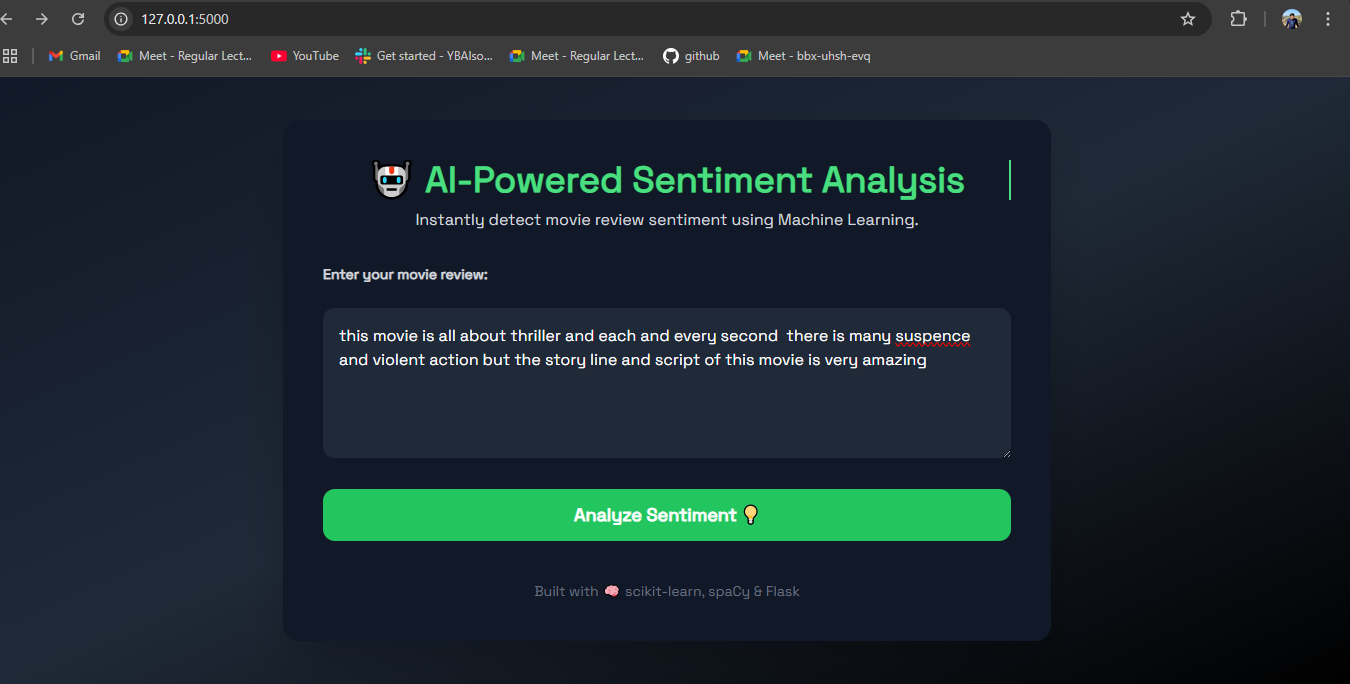

<br>
<br>

## 🗃️ Dataset Description

The dataset used in this project is the IMDB Movie Reviews Dataset, which contains 50,000 movie reviews labeled as either positive or negative. It is commonly used for binary sentiment classification tasks in natural language processing.

### 📌 Dataset Overview

- Total Records: 50,000
- Columns:
  - review: The full text of a movie review written by a user.
  - sentiment: The label indicating sentiment:
    - positive — represents a favorable review
    - negative — represents a critical or unfavorable review

### 🔍 Notes

- The dataset is evenly balanced: 25,000 positive and 25,000 negative reviews.
- Reviews are written in natural, informal language with varied sentence lengths and structures.
- No additional metadata (e.g., rating, genre) is included.

This dataset is ideal for training supervised learning models to perform binary sentiment classification.

<br>

### 📊 Dataset Columns and Data Types

| Column Name      | Data Type | Description                                 |
|------------------|-----------|---------------------------------------------|
| review           | object    | The text of the movie review (raw text)     |
| sentiment        | object    | Review label: 'positive' or 'negative'      |

<br>
<br>


---

<br>
<br>

## 📁 **Step 1: Import Libraries and Load Dataset**
We begin by importing the necessary Python libraries and loading the IMDB dataset.


In [10]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP and Text Processing
import spacy
import re
import string

# Model Saving
import joblib

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Load dataset
df = pd.read_csv('IMDB Dataset.csv')
df


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## 📊 **Step 2: Exploratory Data Analysis (EDA)**
Let's explore the dataset to understand its structure and basic statistics.


Dataset Statistics:
Total Reviews: 50000
Positive Reviews: 25000
Negative Reviews: 25000
Average Review Length: 1309 characters


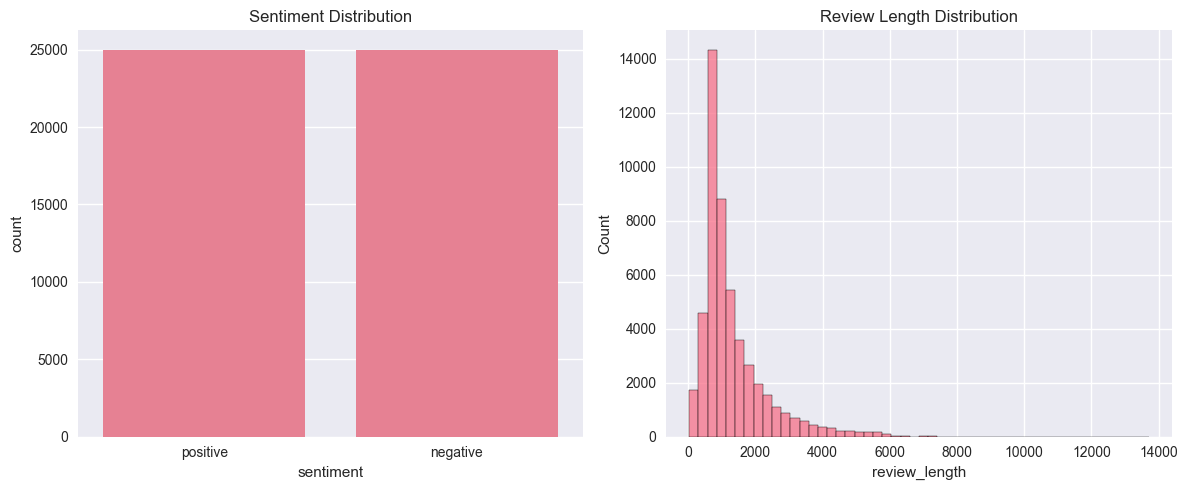

In [14]:
# Print basic statistics
print("Dataset Statistics:")
print(f"Total Reviews: {len(df)}")
print(f"Positive Reviews: {len(df[df['sentiment'] == 'positive'])}")
print(f"Negative Reviews: {len(df[df['sentiment'] == 'negative'])}")
print(f"Average Review Length: {df['review_length'].mean():.0f} characters")

# Create two simple plots
plt.figure(figsize=(12, 5))

# Plot 1: Sentiment Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')

# Plot 2: Review Length Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='review_length', bins=50)
plt.title('Review Length Distribution')

plt.tight_layout()
plt.show()


## 🧹 **Step 3: Text Preprocessing using spaCy**
We clean the text by:
- Lowercasing
- Removing special characters, numbers
- Removing stopwords
- Lemmatization


Note: Ensure you have the model installed with `python -m spacy download en_core_web_sm`

In [16]:
# Load spaCy English model
# Note: Ensure you have the model installed with `python -m spacy download en_core_web_sm`
# If you don't have spaCy installed, you can install it using pip:
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r'\[.*?\]', '', text)          # Remove [brackets]
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)           # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # Remove special chars and numbers

    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

# Apply preprocessing on a small sample for speed (or all for final training)
df['cleaned_review'] = df['review'].apply(preprocess_text)
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,reviewer mention watch oz episode ll hook righ...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,basically s family little boy jake think s zom...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


## 🧠 **Step 4: Feature Engineering with TF-IDF**
We convert the cleaned text reviews into numerical vectors using `TfidfVectorizer`, which helps quantify word importance.


In [17]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf.fit_transform(df['cleaned_review'])

# Encode sentiment labels (positive -> 1, negative -> 0)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 **Step 5: Model Training**
We train 4 machine learning models and compare their performance:
- Logistic Regression
- Multinomial Naive Bayes
- Random Forest
- Support Vector Machine (SVM)


In [30]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": LinearSVC()
}

trained_models = {}

for name, model in models.items():
    print(f"\n🔹 Training: {name}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    trained_models[name] = model



🔹 Training: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4961
           1       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


🔹 Training: Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4961
           1       0.84      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


🔹 Training: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84

In [36]:


for idx, (name, model) in enumerate(trained_models.items()):
    # Get predictions and confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\nConfusion Matrix for {name}:")
    print("True Negative:", cm[0][0])
    print("False Positive:", cm[0][1])
    print("False Negative:", cm[1][0])
    print("True Positive:", cm[1][1])



Confusion Matrix for Logistic Regression:
True Negative: 4281
False Positive: 680
False Negative: 519
True Positive: 4520

Confusion Matrix for Naive Bayes:
True Negative: 4168
False Positive: 793
False Negative: 749
True Positive: 4290

Confusion Matrix for Random Forest:
True Negative: 4218
False Positive: 743
False Negative: 828
True Positive: 4211

Confusion Matrix for SVM:
True Negative: 4266
False Positive: 695
False Negative: 574
True Positive: 4465


## 💾 **Step 7: Automatically Select & Save Best Model**
We compare the performance of all trained models using accuracy, then save the best one along with the TF-IDF vectorizer.


In [32]:
from sklearn.metrics import accuracy_score, f1_score

# Store evaluation results
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

# Create a DataFrame to display results
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("🔍 Model Comparison:")
print(results_df)

# Select best model based on accuracy (or F1 if you prefer)
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"\n✅ Best model selected: {best_model_name}")

# Save the best model and vectorizer
joblib.dump(best_model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


🔍 Model Comparison:
                 Model  Accuracy  F1 Score
0  Logistic Regression    0.8801  0.882899
3                  SVM    0.8731  0.875576
1          Naive Bayes    0.8458  0.847659
2        Random Forest    0.8429  0.842790

✅ Best model selected: Logistic Regression


['tfidf_vectorizer.pkl']

# 📊 Sentiment Analysis: Model Evaluation Summary

## 🔍 Model Comparison

| Model                | Accuracy | F1 Score |
|---------------------|----------|----------|
| Logistic Regression | 0.8801   | 0.8829   |
| SVM                 | 0.8731   | 0.8756   |
| Naive Bayes         | 0.8458   | 0.8477   |
| Random Forest       | 0.8429   | 0.8428   |

➡️ Logistic Regression achieved the highest performance in both accuracy and F1 score.

---

## 🧮 Confusion Matrices

| Model                | True Negative | False Positive | False Negative | True Positive |
|---------------------|---------------|----------------|----------------|---------------|
| Logistic Regression | 4281          | 680            | 519            | 4520          |
| Naive Bayes         | 4168          | 793            | 749            | 4290          |
| Random Forest       | 4218          | 743            | 828            | 4211          |
| SVM                 | 4266          | 695            | 574            | 4465          |

---

## 📈 Classification Report Scores

| Model                | Precision (0) | Recall (0) | F1 (0) | Precision (1) | Recall (1) | F1 (1) | Accuracy |
|---------------------|---------------|------------|--------|----------------|------------|--------|----------|
| Logistic Regression | 0.89          | 0.86       | 0.88   | 0.87           | 0.90       | 0.88   | 0.88     |
| Naive Bayes         | 0.85          | 0.84       | 0.84   | 0.84           | 0.85       | 0.85   | 0.85     |
| Random Forest       | 0.84          | 0.85       | 0.84   | 0.85           | 0.84       | 0.84   | 0.84     |
| SVM                 | 0.88          | 0.86       | 0.87   | 0.87           | 0.89       | 0.88   | 0.87     |

ℹ️ Support for each class was approximately 5000 samples.

---

✅ Final Choice: Logistic Regression was selected as the final model based on the highest accuracy and F1 score.

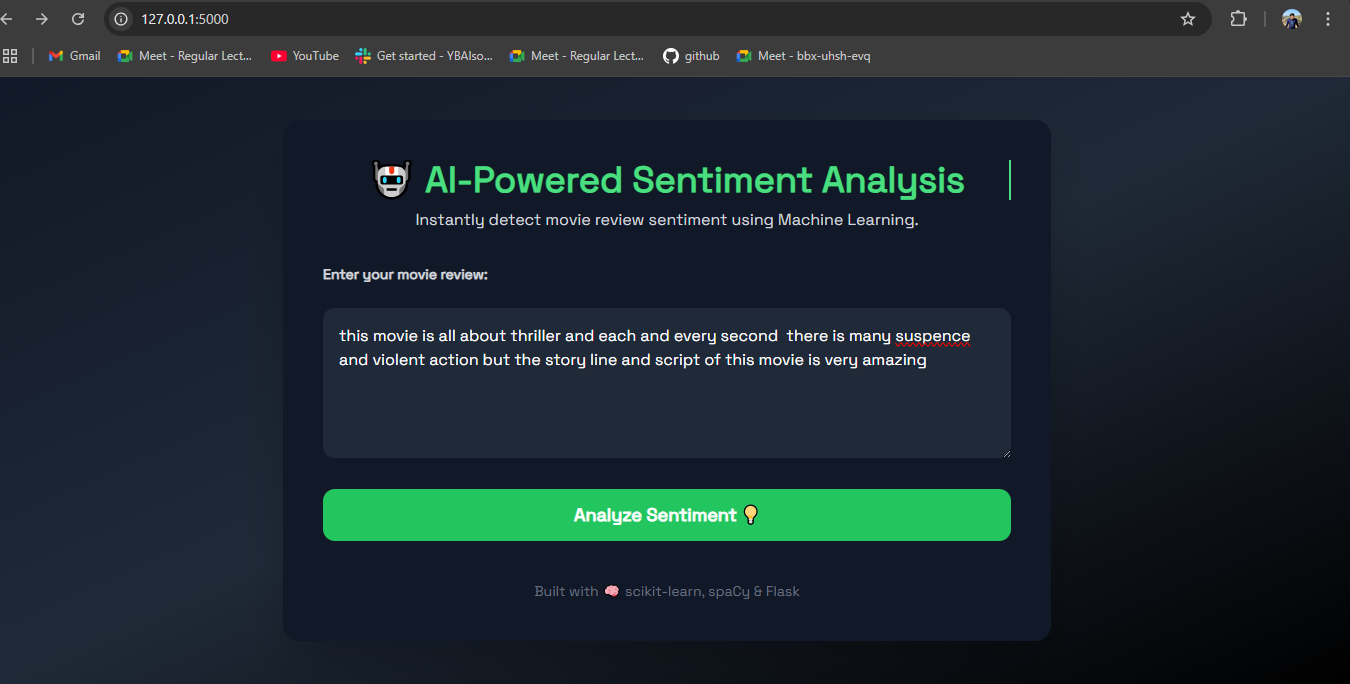